In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load dataset

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
df['Occupation']

,Occupation
0,Self_Employed
1,Retired
2,Student
3,Self_Employed
4,Professional
...,...
19995,Self_Employed
19996,Student
19997,Professional
19998,Professional


In [ ]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# EDA

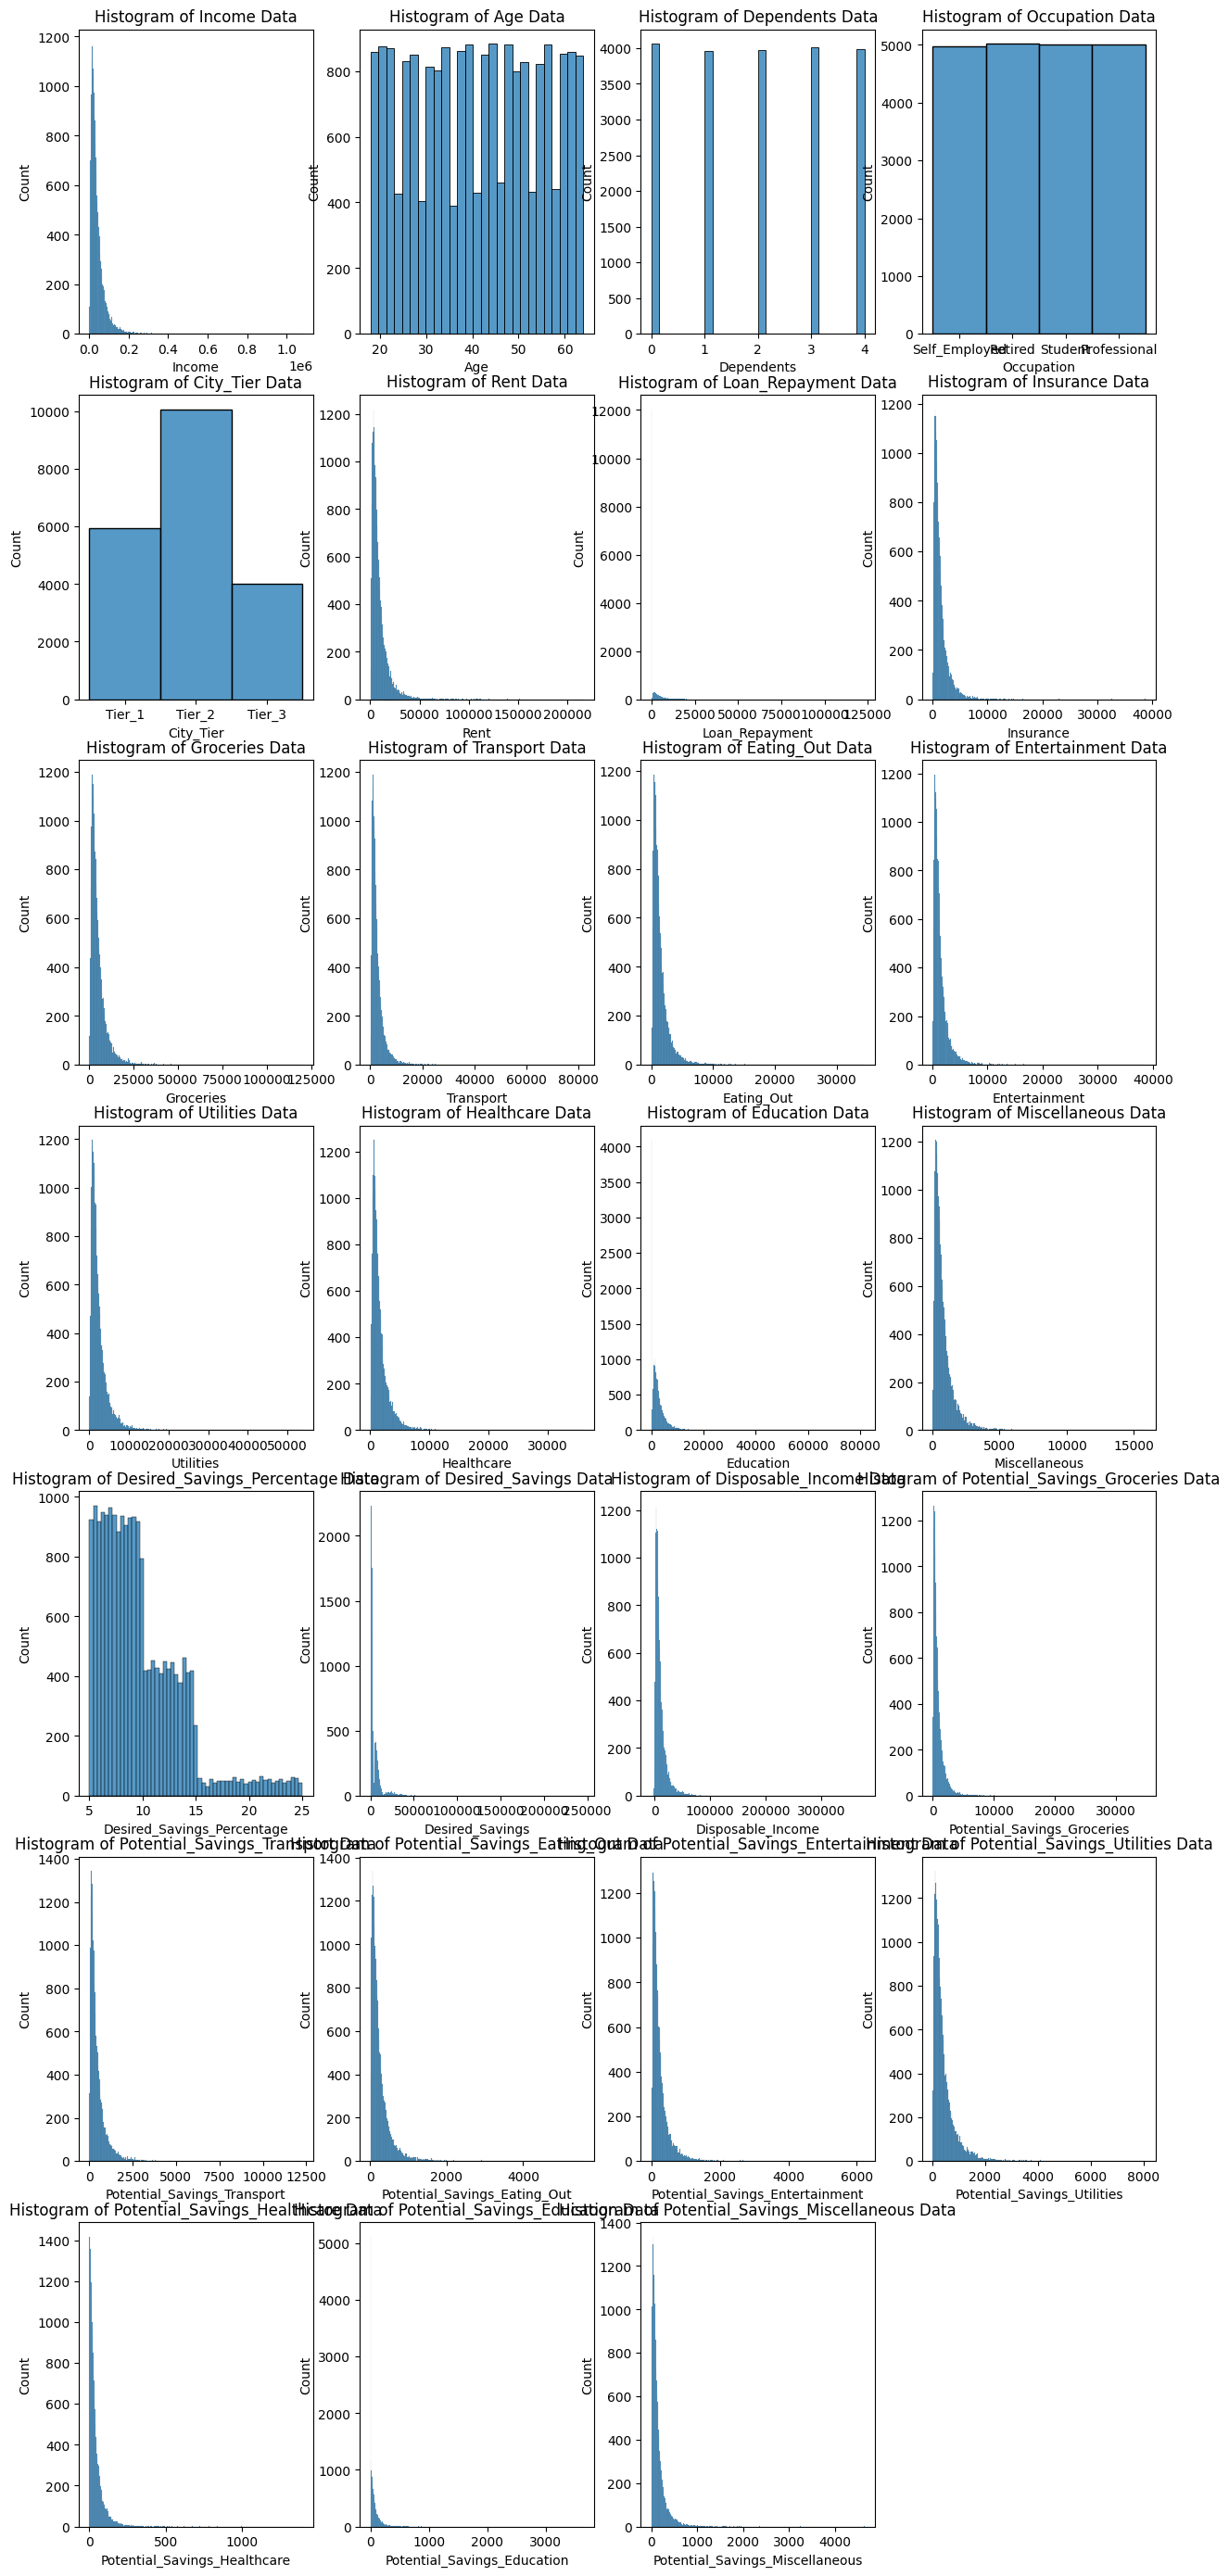

In [ ]:
# Histogram of all feature
plt.figure(figsize = (15, 35))
for i, col in enumerate(df.columns, 1):
    plt.subplot(7, 4, i)
    sns.histplot(x = df[col])
    plt.title(f"Histogram of {col} Data")
    plt.plot()


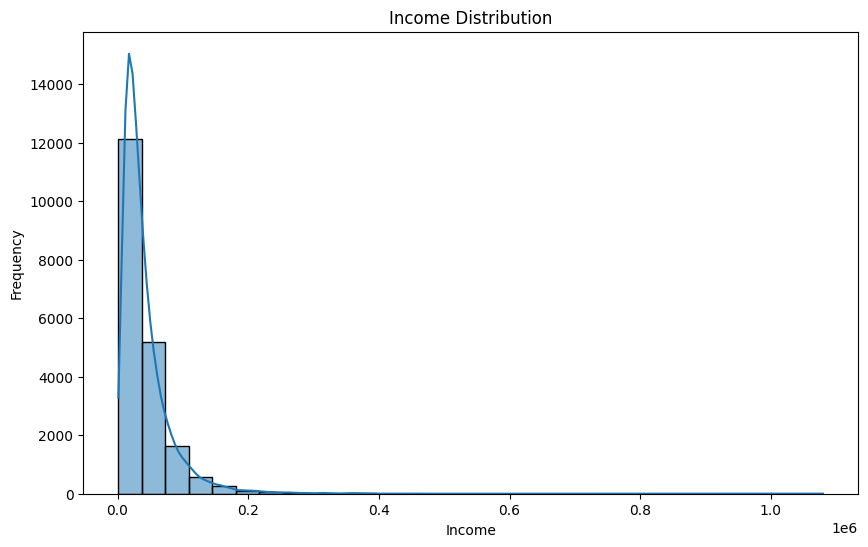

In [ ]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

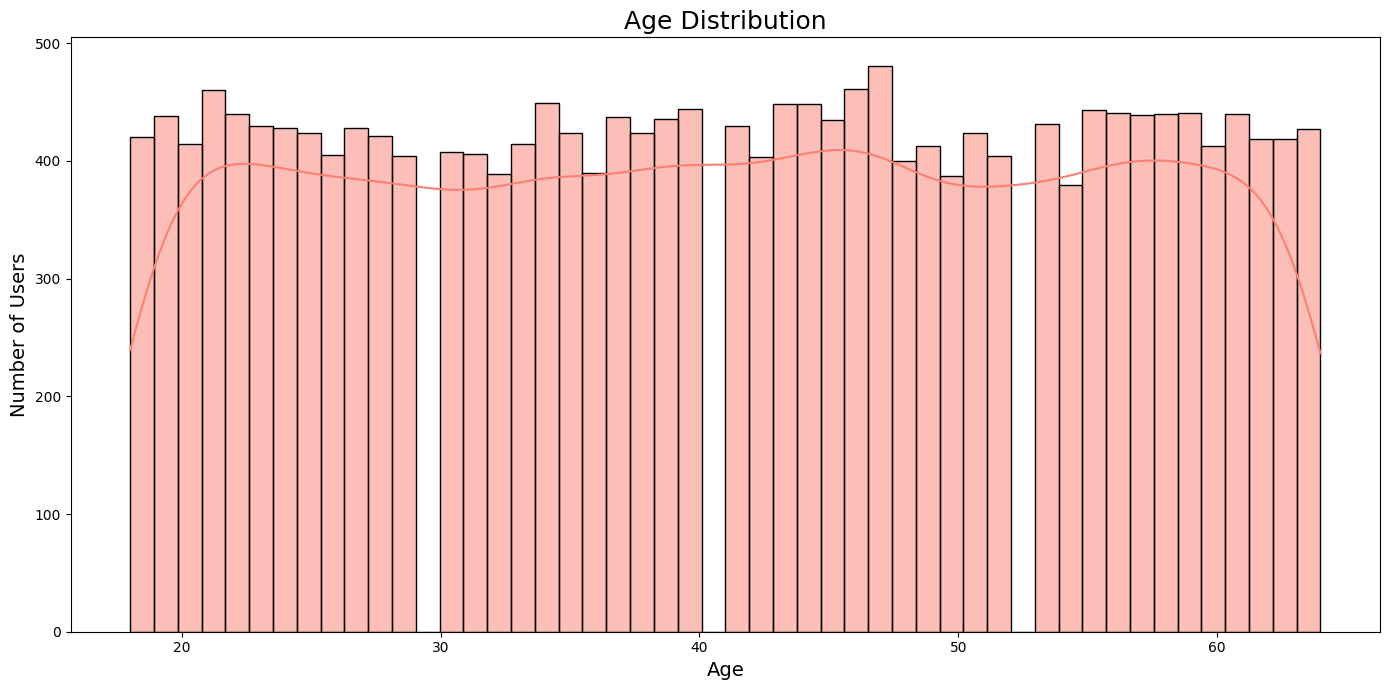

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Age'], bins=50, kde=True, color='salmon')
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()


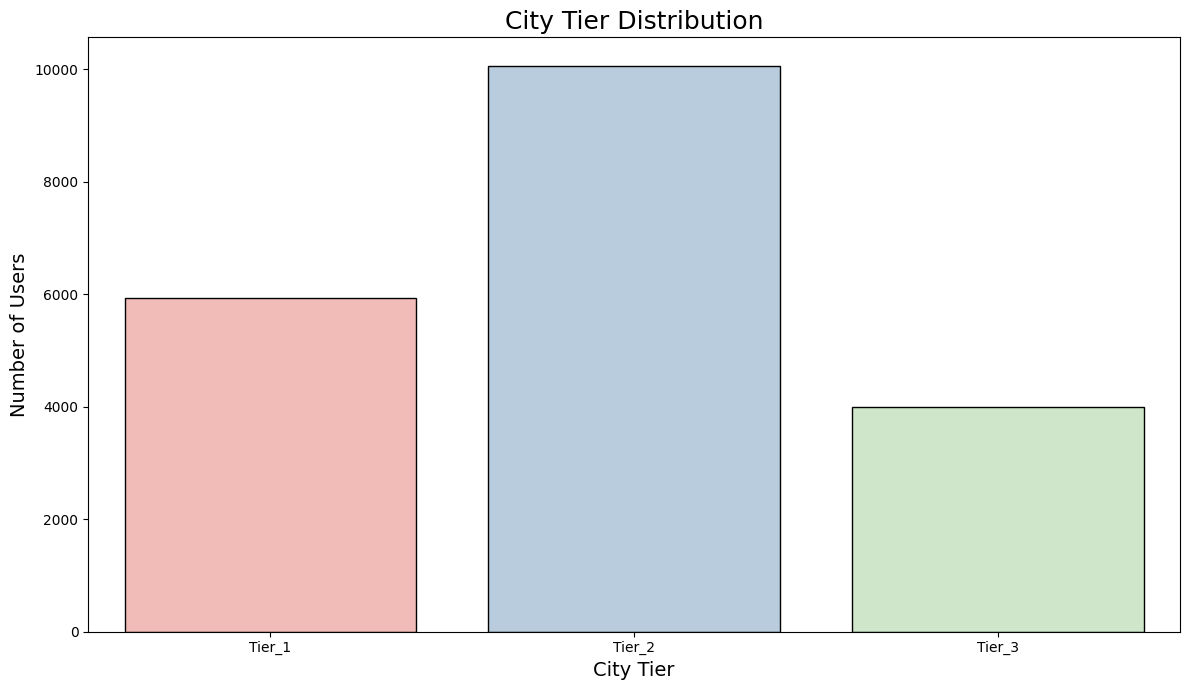

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

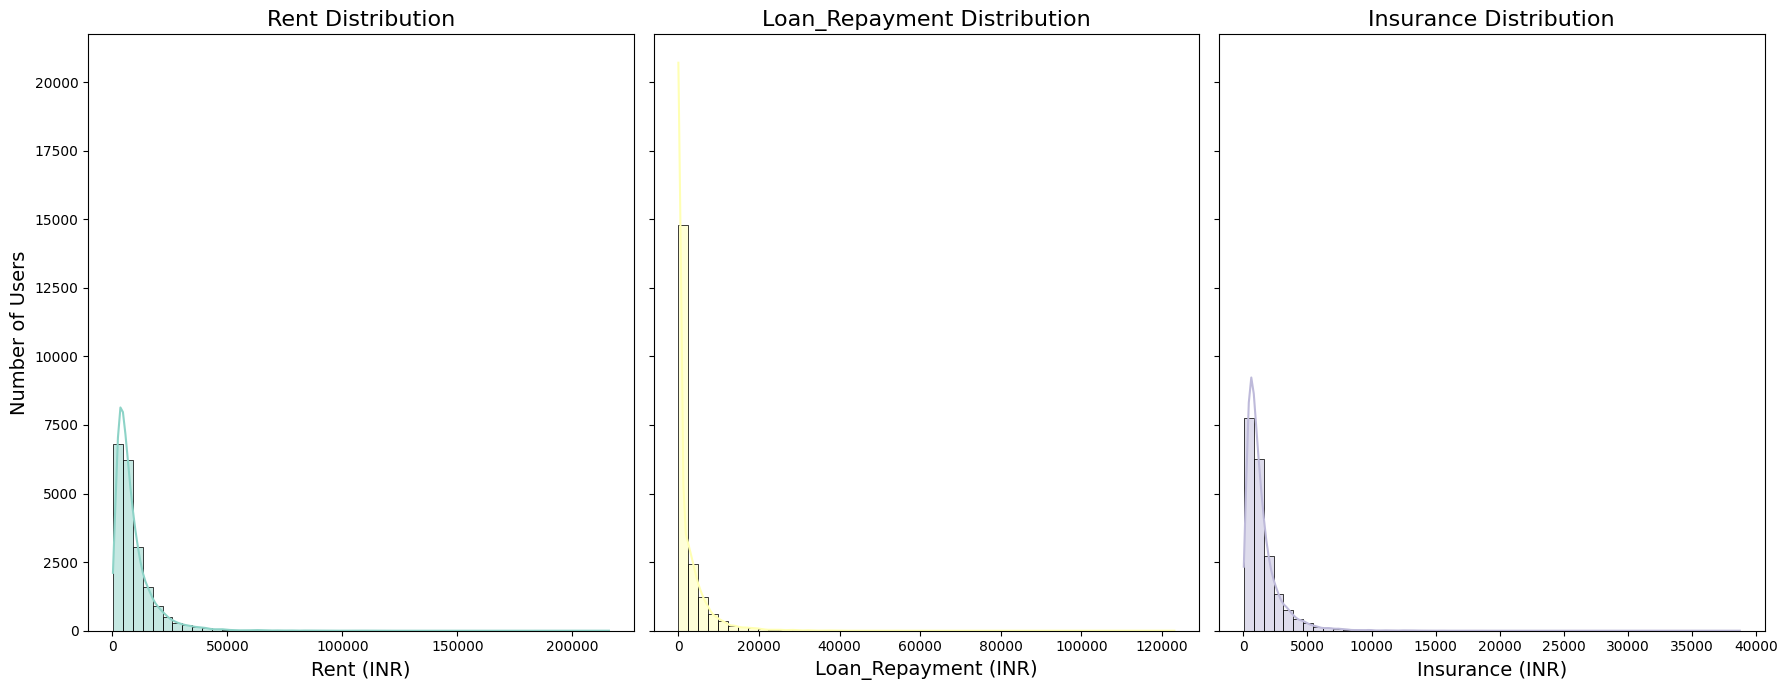

In [ ]:
fixed_expenses = ['Rent', 'Loan_Repayment', 'Insurance']
num_fixed = len(fixed_expenses)

fixed_palette = sns.color_palette("Set3", num_fixed)

fig, axes = plt.subplots(1, num_fixed, figsize=(18, 7), sharey=True)

for ax, expense, color in zip(axes, fixed_expenses, fixed_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()

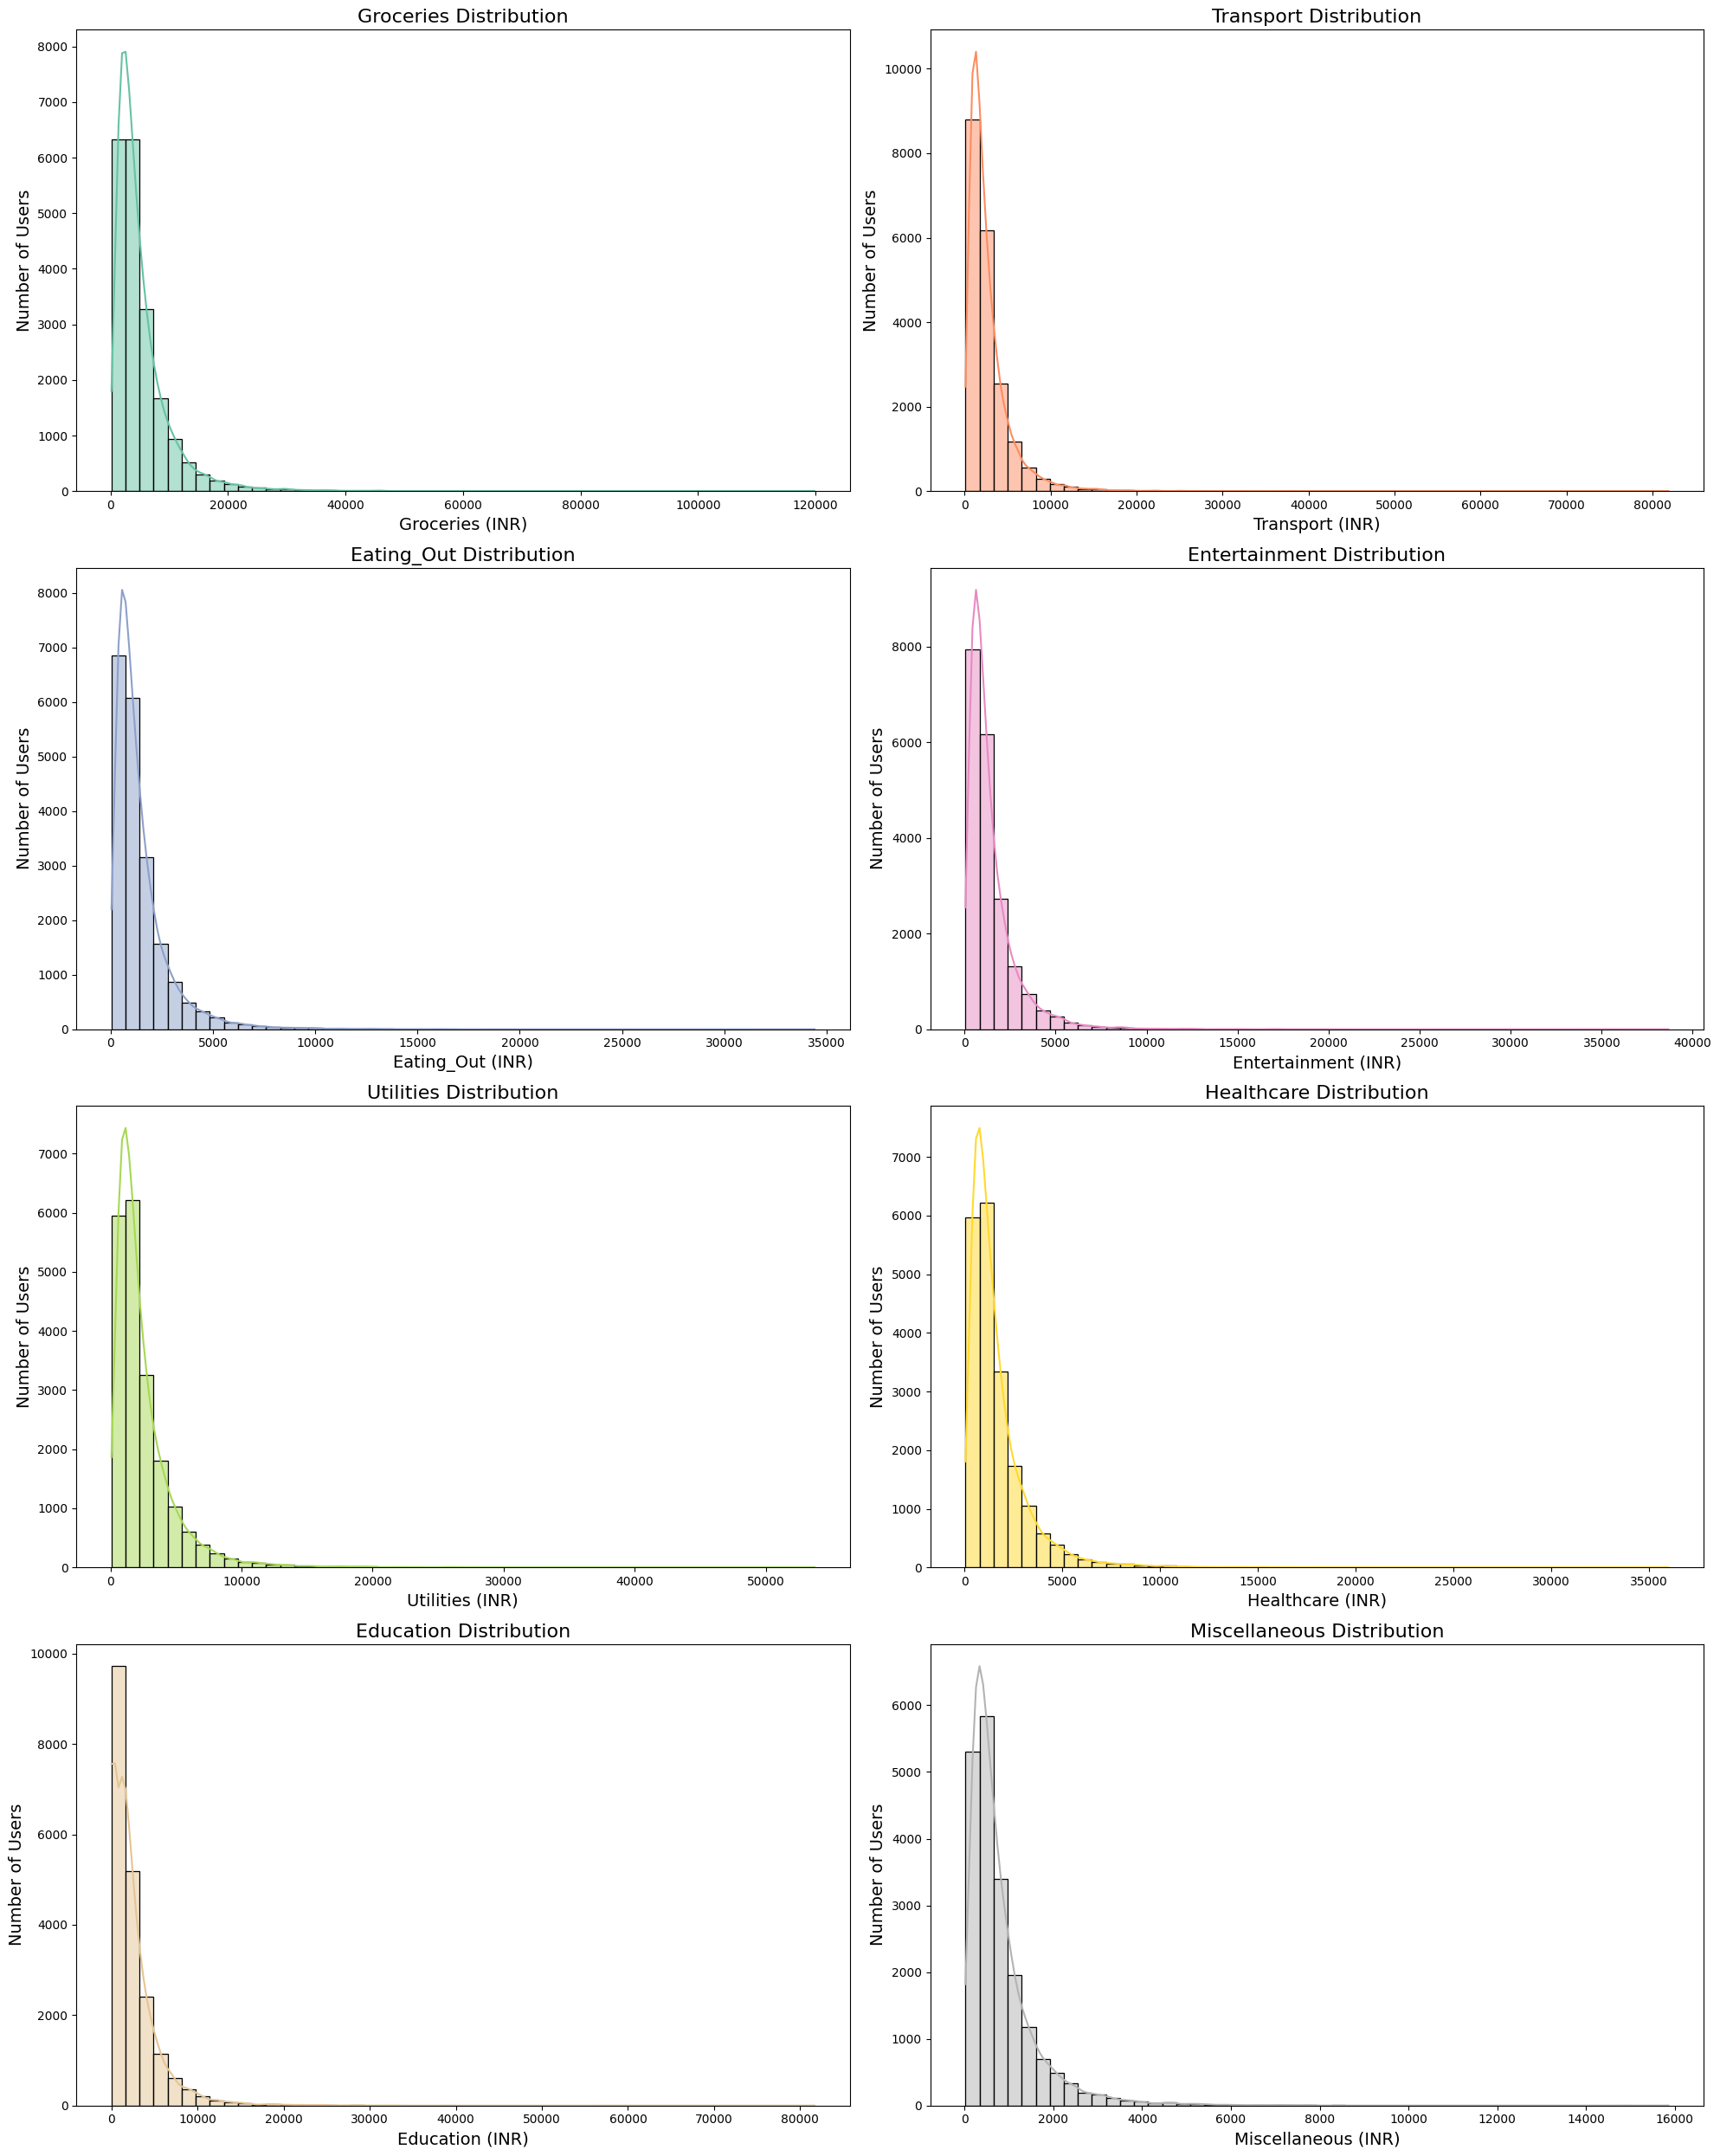

In [ ]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]
num_variable = len(variable_expenses)

variable_palette = sns.color_palette("Set2", num_variable)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, expense, color in zip(axes, variable_expenses, variable_palette):
    sns.histplot(df[expense], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{expense} Distribution', fontsize=16)
    ax.set_xlabel(f'{expense} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()


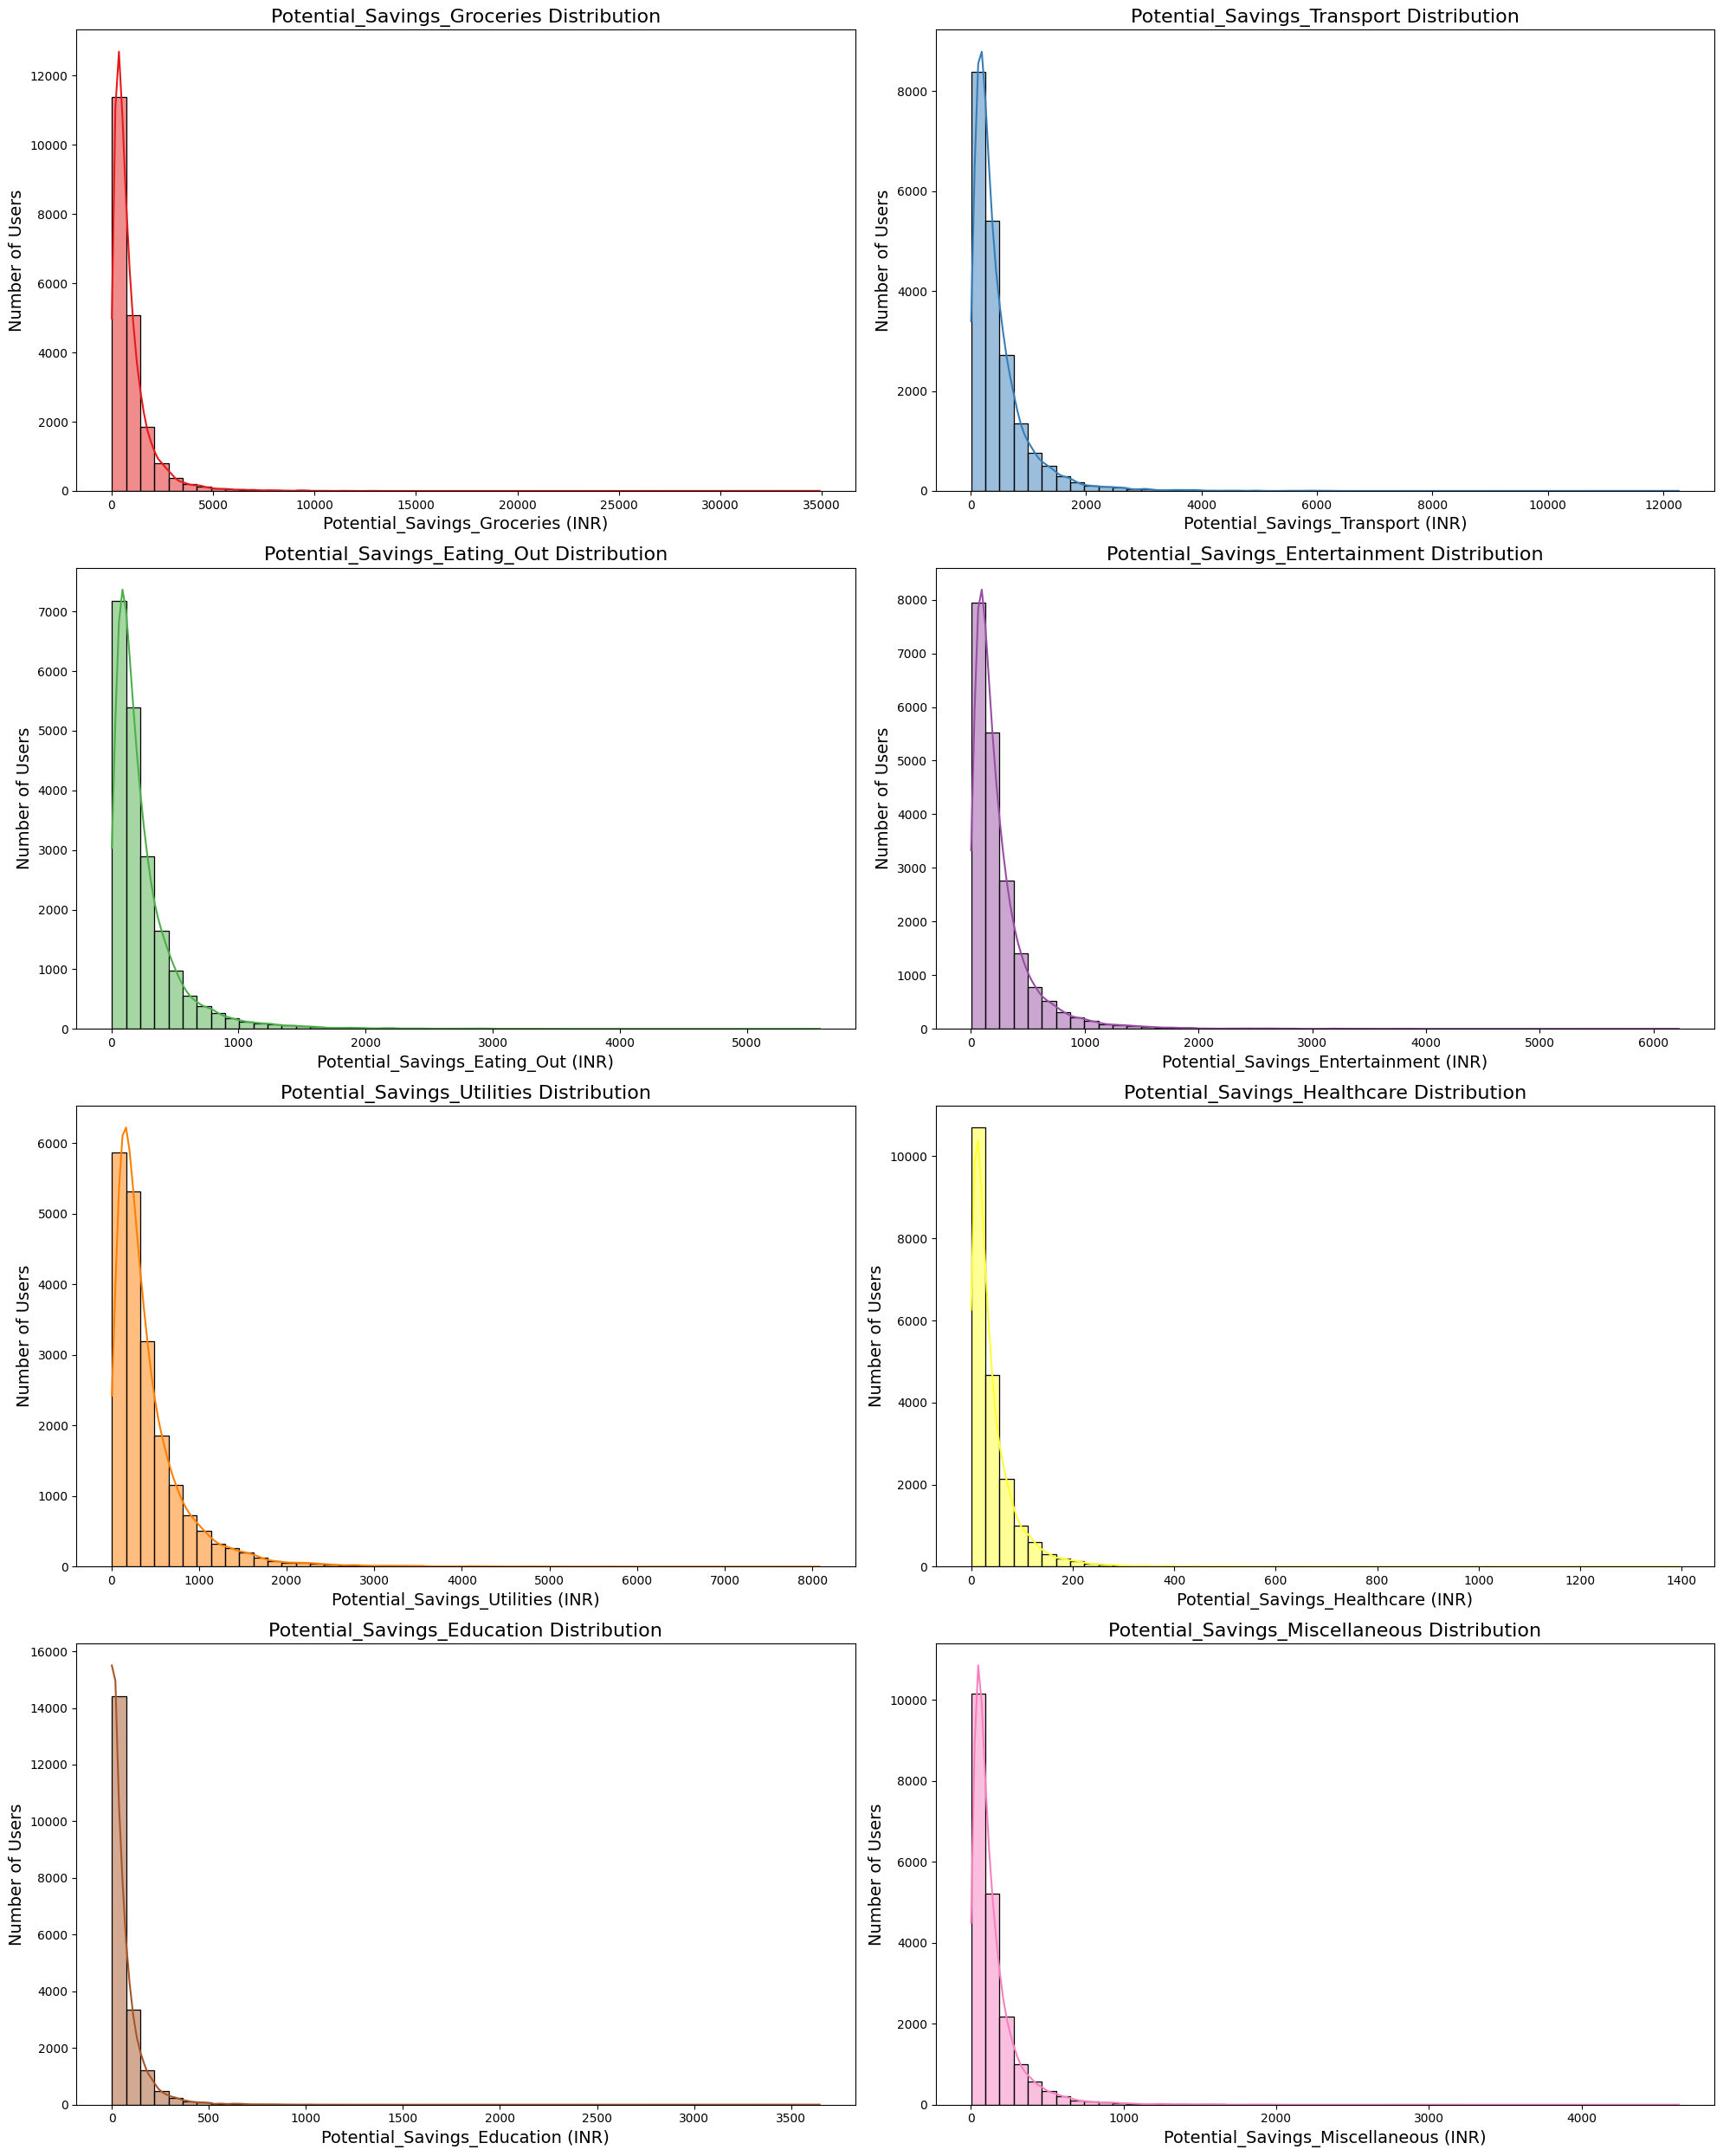

In [ ]:
potential_savings_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

num_potential = len(potential_savings_columns)
palette_potential = sns.color_palette("Set1", num_potential)

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

for ax, column, color in zip(axes, potential_savings_columns, palette_potential):
    sns.histplot(df[column], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column} (INR)', fontsize=14)
    ax.set_ylabel('Number of Users', fontsize=14)

plt.tight_layout()
plt.show()


# Feature Selection


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define core features
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

# Define targets
target_columns = [f'Potential_Savings_{cat}' for cat in variable_expenses]

# Calculate derived features FIRST
df['Disposable_Income'] = df['Income'] - (df['Rent'] + df['Loan_Repayment'] + df['Insurance'] + df['Groceries'] + df['Transport'] + df['Eating_Out'] + df['Entertainment'] + df['Utilities'] + df['Healthcare'] + df['Education']  + df['Miscellaneous'] )
df['Desired_Savings_Percentage'] = (df['Desired_Savings'] / df['Income']) * 100


# Define input features (MUST INCLUDE ALL USED FEATURES)
numerical_features = [
    'Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment',
    'Insurance','Disposable_Income', 'Desired_Savings',
    'Desired_Savings_Percentage'  # MUST BE PRESENT
] + variable_expenses

categorical_features = ['Occupation', 'City_Tier']


# Validate features
valid_categorical = [col for col in categorical_features if col in df.columns]
valid_numerical = [col for col in numerical_features if col in df.columns]
valid_targets = [col for col in target_columns if col in df.columns]

print("Missing numerical features:", set(numerical_features) - set(valid_numerical))
print("Missing categorical features:", set(categorical_features) - set(valid_categorical))

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df[valid_categorical])
encoded_columns = encoder.get_feature_names_out(valid_categorical)

# Create final feature set
X = pd.concat([
    df[valid_numerical],
    pd.DataFrame(encoded_cats, columns=encoded_columns, index=df.index)
], axis=1)

y = df[valid_targets]

print("\nFinal features:", X.columns.tolist())
print("Feature matrix shape:", X.shape)

Missing numerical features: set()
Missing categorical features: set()

Final features: ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Disposable_Income', 'Desired_Savings', 'Desired_Savings_Percentage', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Occupation_Retired', 'Occupation_Self_Employed', 'Occupation_Student', 'City_Tier_Tier_2', 'City_Tier_Tier_3']
Feature matrix shape: (20000, 22)


In [ ]:
import joblib

joblib.dump(X.columns.tolist(), 'feature_order.joblib')  # Save the column order

['feature_order.joblib']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Copy your original feature dataframe
df_features = X.copy()

# Scale the numerical features
scaled_numerical = scaler.fit_transform(df_features[numerical_features])



# Create a DataFrame for the scaled features
df_scaled_numerical = pd.DataFrame(
    scaled_numerical,
    columns=numerical_features,
    index=df_features.index
)

# Update the original DataFrame with the scaled values
df_features.update(df_scaled_numerical)





In [ ]:
X = df_features

y = df[target_columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest Model






In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
joblib.dump(model, 'savings_predictor_forest.joblib')# Save trained model
import joblib
# Save after training
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')    # Save scaler

joblib.dump(numerical_features, 'numerical_features.joblib')
joblib.dump(categorical_features, 'categorical_features.joblib')


['categorical_features.joblib']

In [ ]:
# Load during prediction
encoder = joblib.load('encoder.joblib')
numerical_features = joblib.load('numerical_features.joblib')
categorical_features = joblib.load('categorical_features.joblib')



# Analysis Predictions



Predicted Potential Savings (per category):
Potential_Savings_Groceries: 2670.94
Potential_Savings_Transport: 1236.58
Potential_Savings_Eating_Out: 825.78
Potential_Savings_Entertainment: 611.54
Potential_Savings_Utilities: 966.28
Potential_Savings_Healthcare: 94.38
Potential_Savings_Education: 122.10
Potential_Savings_Miscellaneous: 373.81

Total Potential Monthly Savings: 6901.39


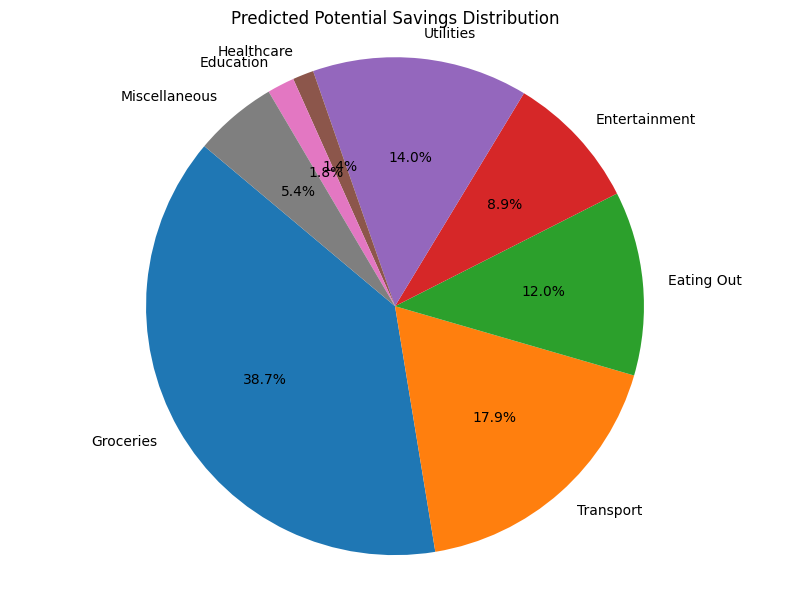

Months needed to reach desired savings: 3 months

Adjusted Expenses after Potential Savings:
Groceries: 12019.06
Transport: 5869.42
Eating_Out: 4214.22
Entertainment: 2246.46
Utilities: 5161.72
Healthcare: 4476.62
Education: 3077.90
Miscellaneous: 2152.19

Model Evaluation Results:
MAE for Potential_Savings_Groceries: 332.63
MAE for Potential_Savings_Transport: 175.21
MAE for Potential_Savings_Eating_Out: 94.76
MAE for Potential_Savings_Entertainment: 92.74
MAE for Potential_Savings_Utilities: 156.39
MAE for Potential_Savings_Healthcare: 21.01
MAE for Potential_Savings_Education: 42.05
MAE for Potential_Savings_Miscellaneous: 56.34

 Final Test MAE (Average across all categories): 121.39


In [ ]:
import pandas as pd
import numpy as np
import joblib
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load components

encoder = joblib.load('encoder.joblib')
scaler = joblib.load('scaler.joblib')


# Define feature lists
numerical_features = [
    'Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance','Disposable_Income', 'Desired_Savings', 'Desired_Savings_Percentage',
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous'
]

categorical_features = ['Occupation', 'City_Tier']
target_columns = [col for col in df.columns if col.startswith('Potential_Savings')]

# Split data (for evaluation)
X = df[numerical_features + categorical_features]
y = df[target_columns]
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# calculate_derived_features
def calculate_derived_features(input_dict):
    """Calculate derived features consistent with training logic"""

    total_expenses = (
        input_dict['Rent'] + input_dict['Loan_Repayment'] + input_dict['Insurance'] +
        input_dict['Groceries'] + input_dict['Transport'] + input_dict['Eating_Out'] +
        input_dict['Entertainment'] + input_dict['Utilities'] +
        input_dict['Healthcare'] + input_dict['Education'] +
        input_dict['Miscellaneous']
    )

    input_dict['Disposable_Income'] = input_dict['Income'] - total_expenses

    input_dict['Desired_Savings_Percentage'] = (
        (input_dict['Desired_Savings'] / input_dict['Income']) * 100
        if input_dict['Income'] != 0 else 0.0
    )

    return input_dict


def test_prediction():
    """Test single prediction and calculate months to reach savings goal"""
    base_input = {

        'Income': 101455,
        'Age': 21,
        'Dependents':0,
        'Occupation': 'Self_Employed',
        'City_Tier': 'Tier_3',
        'Rent': 15218,
        'Loan_Repayment': 6809,
        'Insurance': 4889,
        'Groceries': 14690,
        'Transport': 7106,
        'Eating_Out':5040,
        'Entertainment': 2858,
        'Utilities': 6128,
        'Healthcare': 4571,
        'Education': 3200,
        'Miscellaneous':2526,
        'Desired_Savings': 16694

   # User input
    }

    full_input = calculate_derived_features(base_input)

    try:
        # DataFrame for input
        input_df = pd.DataFrame([full_input])[numerical_features + categorical_features]

        # Encode + scale
        cat_encoded = encoder.transform(input_df[categorical_features])
        num_scaled = scaler.transform(input_df[numerical_features])
        processed_input = np.concatenate([num_scaled, cat_encoded], axis=1)
        feature_order = joblib.load('feature_order.joblib')
        all_feature_names = numerical_features + encoder.get_feature_names_out(categorical_features).tolist()

        processed_input_df = pd.DataFrame(processed_input, columns=all_feature_names)
        processed_input_df = processed_input_df.reindex(columns=feature_order, fill_value=0)

        # Predict
        prediction = model.predict(processed_input_df.to_numpy())[0]

        # Force savings to be 0 if original expense = 0
        category_expense_map = {
            'Potential_Savings_Groceries': 'Groceries',
            'Potential_Savings_Transport': 'Transport',
            'Potential_Savings_Eating_Out': 'Eating_Out',
            'Potential_Savings_Entertainment': 'Entertainment',
            'Potential_Savings_Utilities': 'Utilities',
            'Potential_Savings_Healthcare': 'Healthcare',
            'Potential_Savings_Education': 'Education',
            'Potential_Savings_Miscellaneous': 'Miscellaneous',

        }

        for i, col in enumerate(target_columns):
            related_expense = category_expense_map.get(col)
            if related_expense and full_input.get(related_expense, 1) == 0:
                prediction[i] = 0.0

        # Output corrected savings prediction
        print("\nPredicted Potential Savings (per category):")
        total_monthly_savings = 0
        for col, val in zip(target_columns, prediction):
            print(f"{col}: {val:.2f}")
            total_monthly_savings += val

        print(f"\nTotal Potential Monthly Savings: {total_monthly_savings:.2f}")

        # Plot pie chart of predicted savings
        import matplotlib.pyplot as plt

        labels = []
        values = []

        for col, val in zip(target_columns, prediction):
            if val > 0:
                label = col.replace("Potential_Savings_", "").replace("_", " ")
                labels.append(label)
                values.append(val)

        if values:
            plt.figure(figsize=(8, 6))
            plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
            plt.title('Predicted Potential Savings Distribution')
            plt.axis('equal')
            plt.tight_layout()
            plt.show()

        # Modified rounding logic: use ceiling
        desired_savings = full_input['Desired_Savings']
        if total_monthly_savings > 0:
            months_needed = desired_savings / total_monthly_savings
            rounded_months = int(math.ceil(months_needed))  # <-- ceiling instead of round
            print(f"Months needed to reach desired savings: {rounded_months} months")
        else:
            print("Warning: Predicted savings are zero, can't calculate months needed.")

   # Print adjusted expenses
        print("\nAdjusted Expenses after Potential Savings:")
        for idx, col in enumerate(target_columns):
            exp_cat = category_expense_map.get(col)
            original = full_input.get(exp_cat, 0)
            adjusted = original - prediction[idx]
            print(f"{exp_cat}: {adjusted:.2f}")

    except Exception as e:
        print(f"Prediction error: {e}")


def evaluate_model():
    """Evaluate model performance"""
    try:
        feature_order = joblib.load('feature_order.joblib')

        num_data = scaler.transform(X_test[numerical_features])
        cat_data = encoder.transform(X_test[categorical_features])
        all_feature_names = numerical_features + encoder.get_feature_names_out(categorical_features).tolist()

        processed_X_test = np.concatenate([num_data, cat_data], axis=1)
        processed_X_test_df = pd.DataFrame(processed_X_test, columns=all_feature_names)
        processed_X_test_df = processed_X_test_df.reindex(columns=feature_order, fill_value=0)

        y_pred = model.predict(processed_X_test_df.to_numpy())
        y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
        y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

        print("\nModel Evaluation Results:")
        total_mae = 0
        for col in target_columns:
            mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
            print(f"MAE for {col}: {mae:.2f}")
            total_mae += mae

        avg_mae = total_mae / len(target_columns)
        print(f"\n Final Test MAE (Average across all categories): {avg_mae:.2f}")

    except Exception as e:
        print(f"\nEvaluation Error: {str(e)}")


# Run
test_prediction()
evaluate_model()


# Actual vs Predicted Saving Scatter Plots

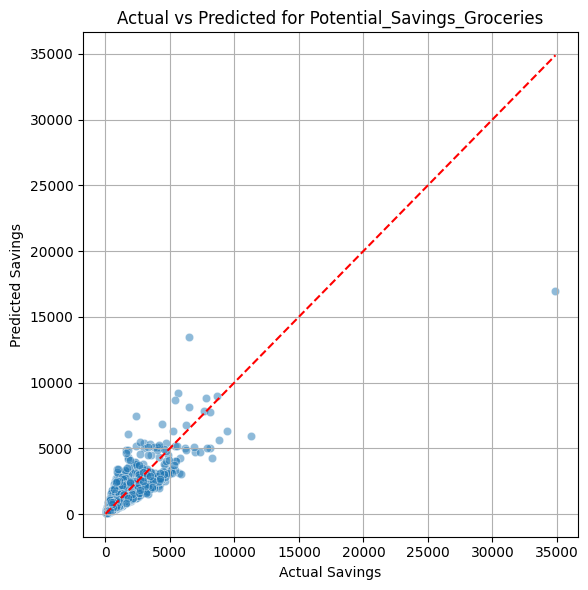

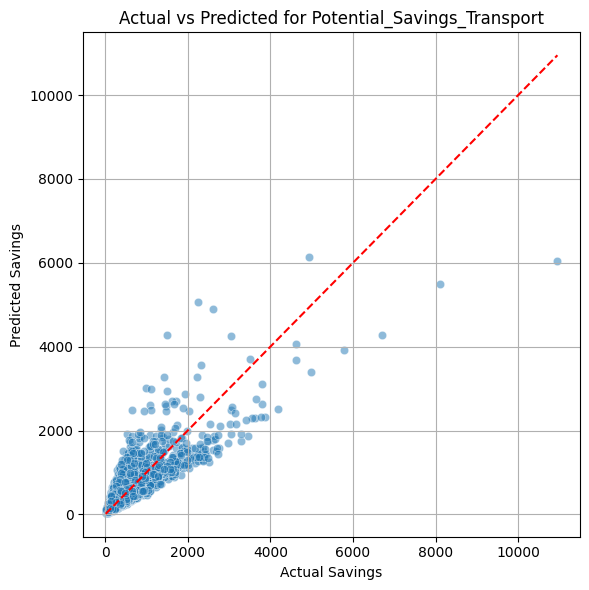

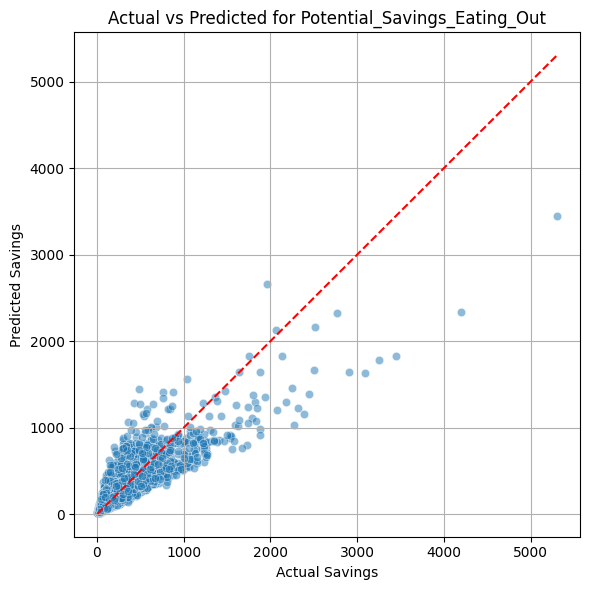

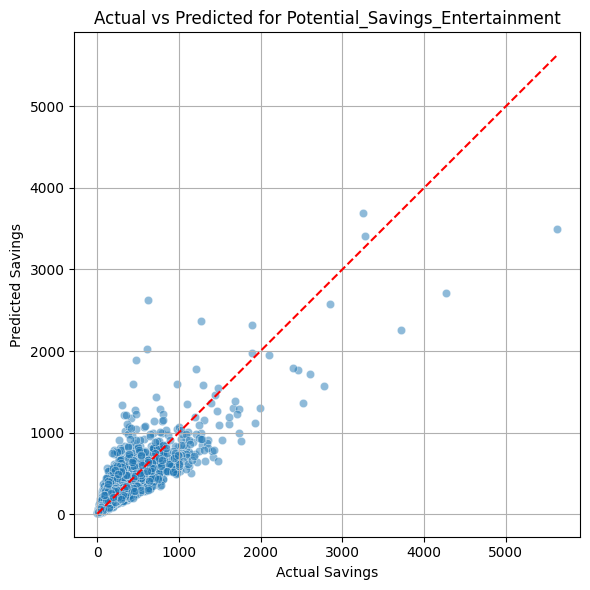

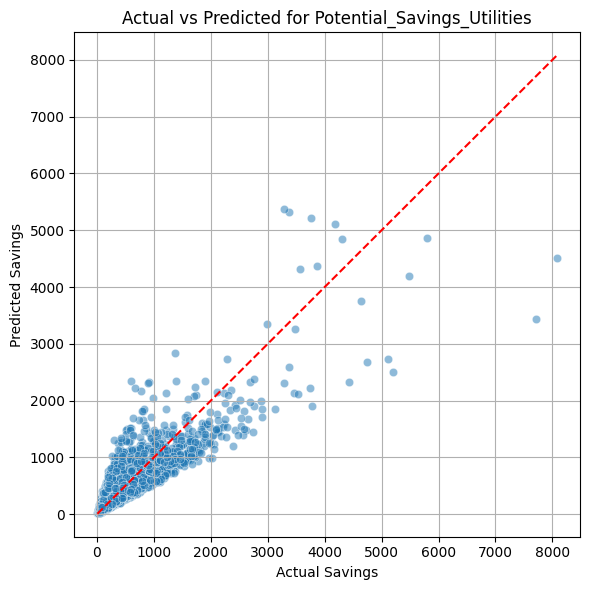

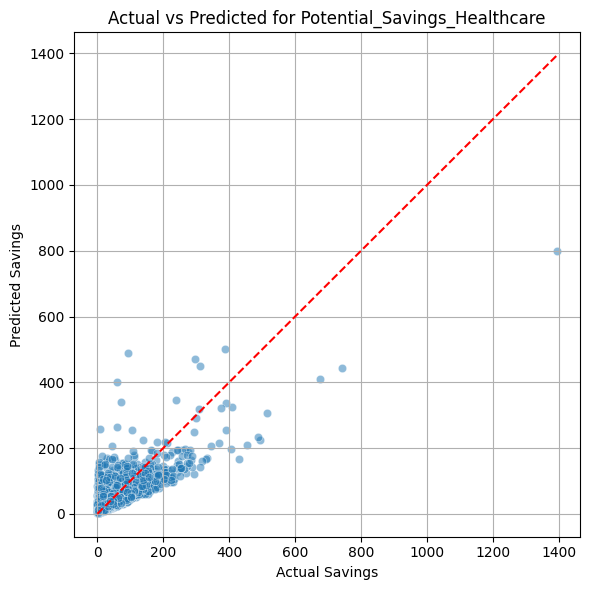

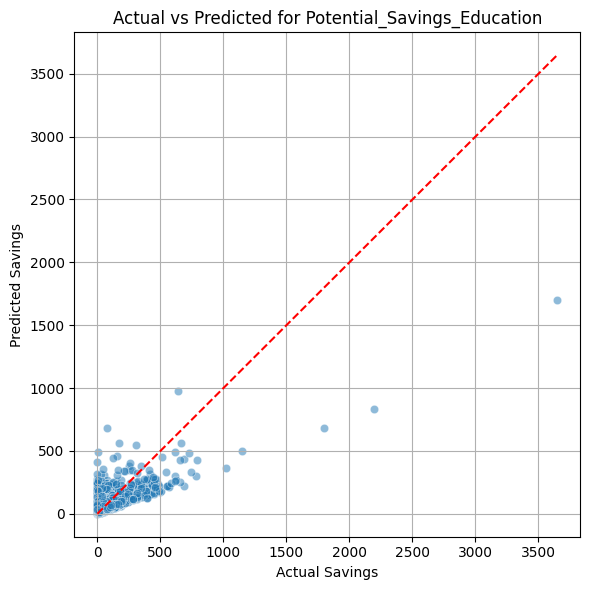

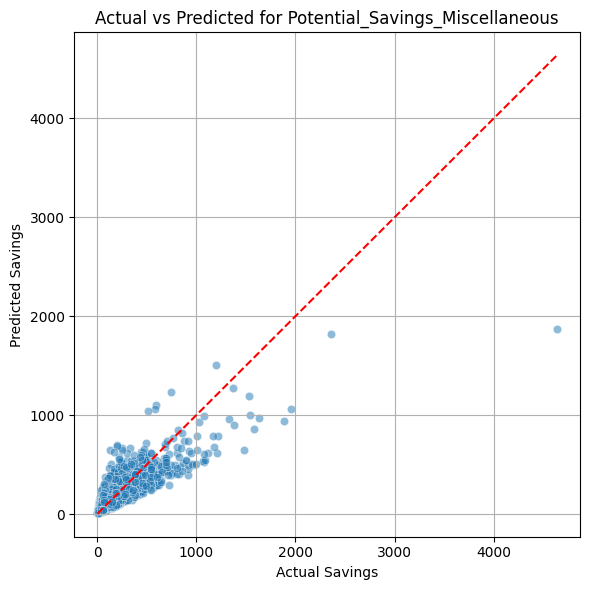

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load saved preprocessing info
feature_order = joblib.load('feature_order.joblib')

# Process X_test the same way as in evaluation
X_test_ordered = X_test[numerical_features + categorical_features]
num_data = scaler.transform(X_test_ordered[numerical_features])
cat_data = encoder.transform(X_test_ordered[categorical_features])

cat_and_num_feature_names = numerical_features + encoder.get_feature_names_out(categorical_features).tolist()
processed_X_test = np.concatenate([num_data, cat_data], axis=1)
processed_X_test_df = pd.DataFrame(processed_X_test, columns=cat_and_num_feature_names)

# Reorder columns to match training
processed_X_test_df = processed_X_test_df.reindex(columns=feature_order, fill_value=0)

# Predict
y_pred = model.predict(processed_X_test_df.to_numpy())

# Convert predictions and actual values to DataFrames
y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

# Plot Actual vs Predicted for each category
for col in target_columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test_df[col], y=y_pred_df[col], alpha=0.5)
    plt.plot([y_test_df[col].min(), y_test_df[col].max()],
             [y_test_df[col].min(), y_test_df[col].max()],
             'r--')
    plt.title(f'Actual vs Predicted for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Predicted Savings')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Prediction Error Distribution

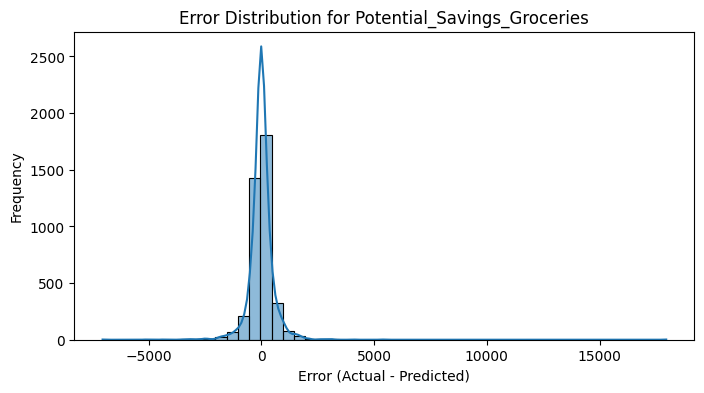

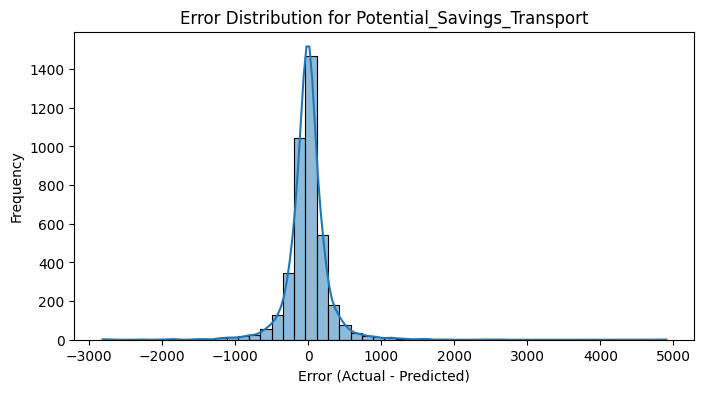

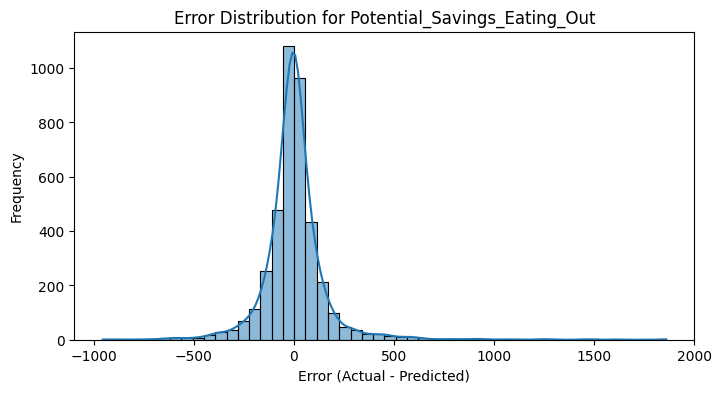

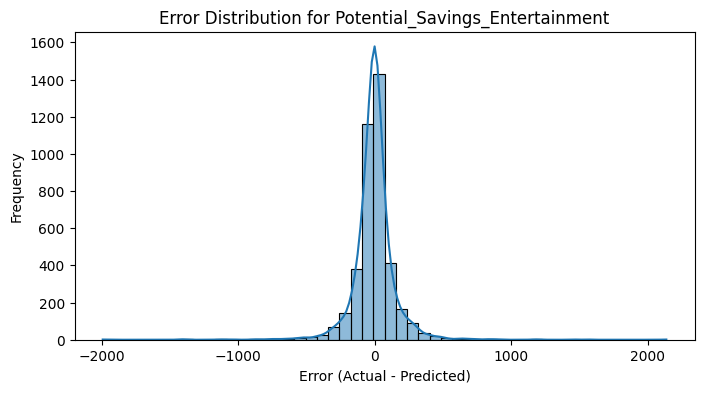

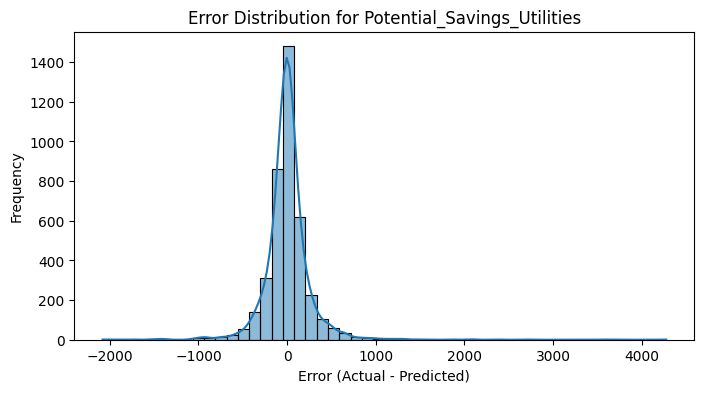

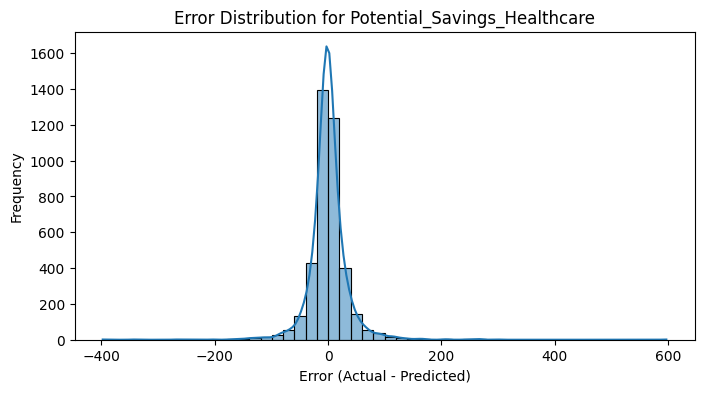

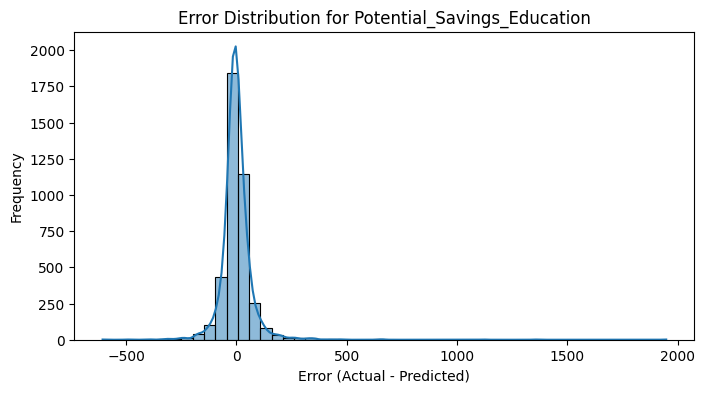

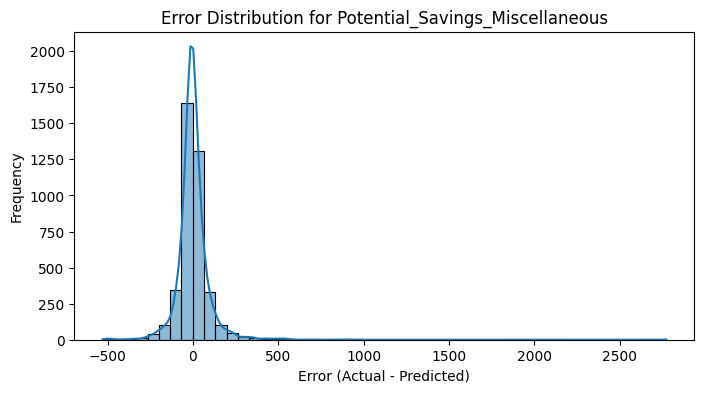

In [ ]:
errors = y_test_df - y_pred_df


for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(errors[col], bins=50, kde=True)
    plt.title(f'Error Distribution for {col}')
    plt.xlabel('Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.show()

# Residual Plots

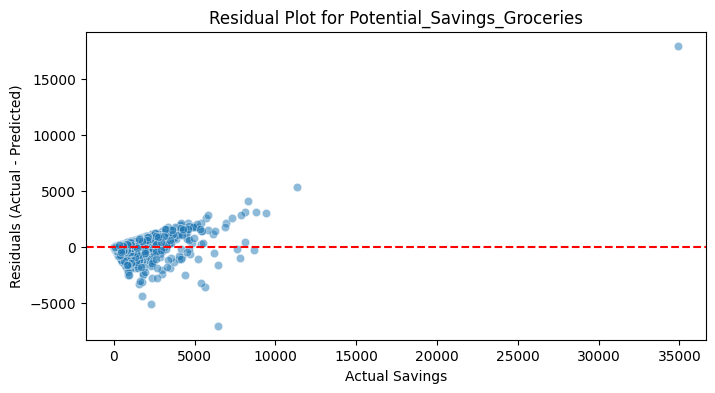

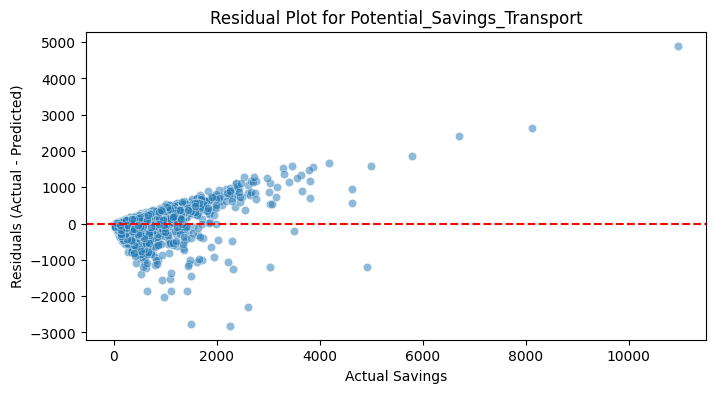

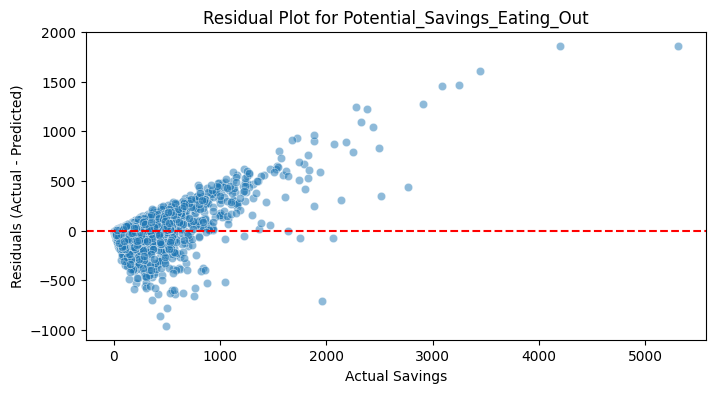

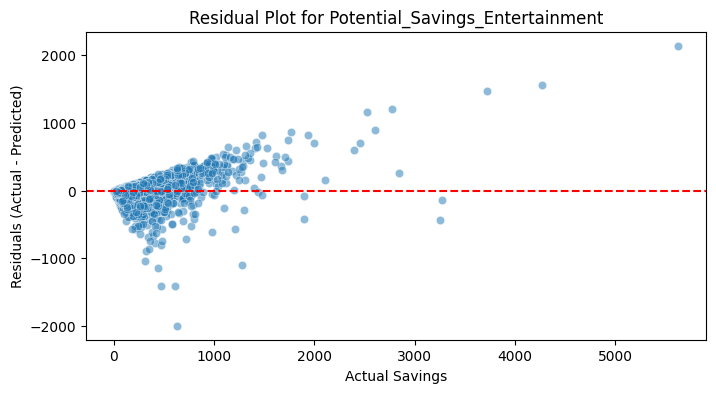

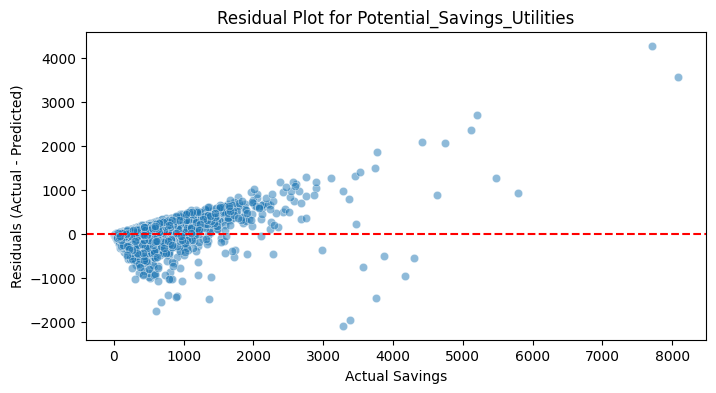

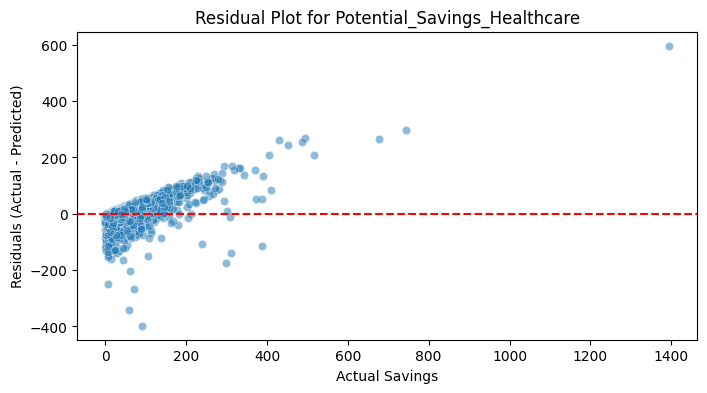

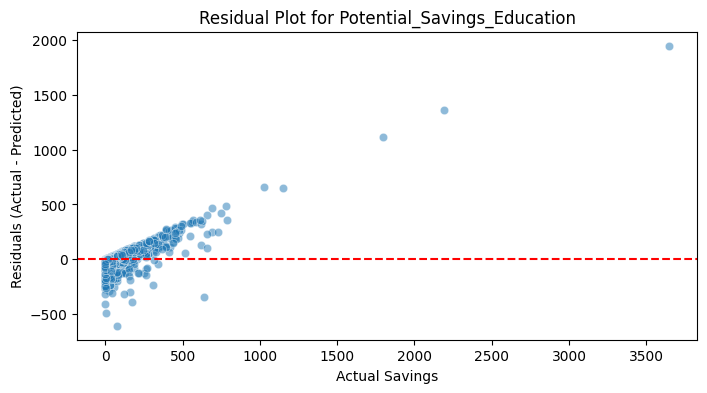

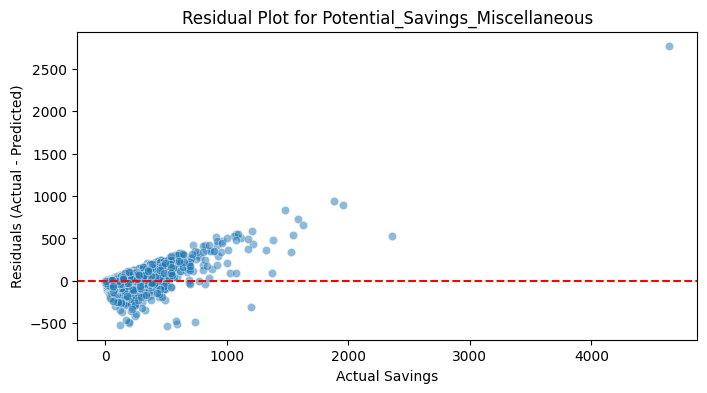

In [ ]:
for col in target_columns:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test_df[col], y=errors[col], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.show()


# Correlation Matix of Error

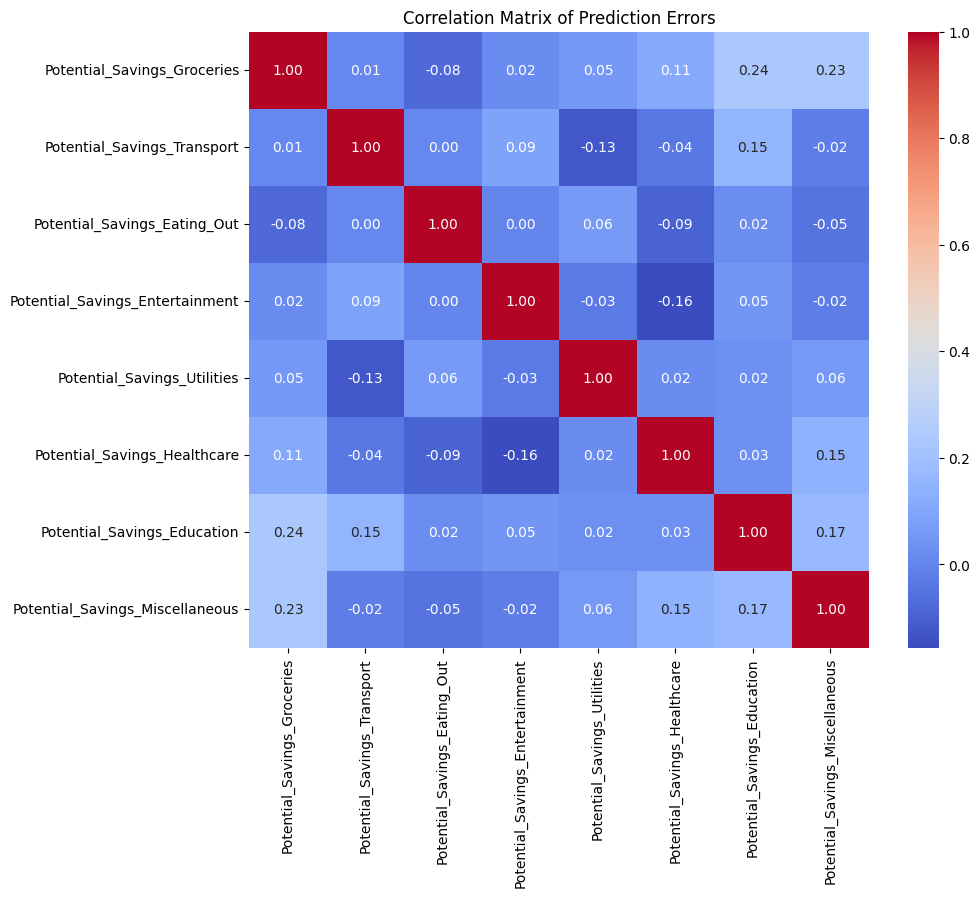

In [ ]:
error_corr = errors.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(error_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Prediction Errors')
plt.show()

In [ ]:
print("Features used in scaler:", numerical_features)
print("Scaler mean:", scaler.mean_)

Features used in scaler: ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Disposable_Income', 'Desired_Savings', 'Desired_Savings_Percentage', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']
Scaler mean: [4.15854961e+04 4.10314500e+01 1.99595000e+00 9.11549463e+03
 2.04980029e+03 1.45502876e+03 1.06473673e+04 4.98287842e+03
 9.41625394e+00 5.20566749e+03 2.70446669e+03 1.46185698e+03
 1.44885366e+03 2.50497695e+03 1.66308179e+03 2.49834842e+03
 8.30553181e+02]


# Backend


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok

# STEP 2: Import libraries
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Request
from fastapi.middleware.cors import CORSMiddleware
from fastapi.responses import RedirectResponse
from fastapi import FastAPI, Request, HTTPException
from pydantic import BaseModel
from datetime import date
from typing import Any
from pyngrok import ngrok

# Apply nest_asyncio to allow nested event loops (necessary for Colab)
nest_asyncio.apply()


# Set ngrok auth token (replace with your ngrok token)
ngrok.set_auth_token("2w94NeiU8eRlBZR2IzuHjTW4GuU_6ktaqtSeLvPNQAr3fUzRC")


In [ ]:
from pydantic import BaseModel
from math import ceil
import pandas as pd
import numpy as np
import joblib

# Initialize FastAPI app
app = FastAPI()

# Allow CORS
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)


# Load model and preprocessing objects
model = joblib.load('savings_predictor_forest.joblib')
encoder = joblib.load('encoder.joblib')
scaler = joblib.load('scaler.joblib')
feature_order = joblib.load('feature_order.joblib')

numerical_features = [
    'Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
    'Disposable_Income', 'Desired_Savings', 'Desired_Savings_Percentage',
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous'
]

# Request and Response schemas
class PlanRequest(BaseModel):
    age: int
    dependents: int
    occupation: str
    city_tier: str
    goalAmount: float
    income: float
    rent: float
    loanPayment: float
    insurance: float
    groceries: float
    transport: float
    eatingOut: float
    education: float
    entertainment: float
    utilities: float
    healthcare: float
    otherMoney: float

class PlanResponse(BaseModel):
    groceriesSavings: float
    transportSavings: float
    eatingOutSavings: float
    entertainmentSavings: float
    utilitiesSavings: float
    healthcareSavings: float
    educationSavings: float
    otherMoneySavings: float
    endDate: int

# Store last request globally
latest_plan = PlanRequest(
    age=0, dependents=0, occupation="", city_tier="", goalAmount=0.0, income=0.0,
    rent=0.0, loanPayment=0.0, insurance=0.0, groceries=0.0, transport=0.0,
    eatingOut=0.0, education=0.0, entertainment=0.0, utilities=0.0,
    healthcare=0.0, otherMoney=0.0
)

@app.post("/receive-data")
async def receive_data(request: Request):
    try:
        data = await request.json()
        global latest_plan
        latest_plan = PlanRequest(**data)
        return {"status": "success", "message": "Data received"}
    except Exception as e:
        return {"status": "error", "message": str(e)}

def predict_plan(plan: PlanRequest) -> PlanResponse:
    try:
        # Prepare input
        input_data = {
            'Income': plan.income,
            'Age': plan.age,
            'Dependents': plan.dependents,
            'Occupation': plan.occupation,
            'City_Tier': plan.city_tier,
            'Rent': plan.rent,
            'Loan_Repayment': plan.loanPayment,
            'Insurance': plan.insurance,
            'Groceries': plan.groceries,
            'Transport': plan.transport,
            'Eating_Out': plan.eatingOut,
            'Entertainment': plan.entertainment,
            'Utilities': plan.utilities,
            'Healthcare': plan.healthcare,
            'Education': plan.education,
            'Miscellaneous': plan.otherMoney,
            'Desired_Savings': plan.goalAmount
        }

        # Derived features
        total_expenses = sum([
            input_data['Rent'], input_data['Loan_Repayment'], input_data['Insurance'],
            input_data['Groceries'], input_data['Transport'], input_data['Eating_Out'],
            input_data['Entertainment'], input_data['Utilities'],
            input_data['Healthcare'], input_data['Education'], input_data['Miscellaneous']
        ])

        input_data['Disposable_Income'] = input_data['Income'] - total_expenses
        input_data['Desired_Savings_Percentage'] = (
            (input_data['Desired_Savings'] / input_data['Income']) * 100
            if input_data['Income'] != 0 else 0.0
        )

        # DataFrame and preprocessing
        df = pd.DataFrame([input_data])
        cat_encoded = encoder.transform(df[['Occupation', 'City_Tier']])
        num_scaled = scaler.transform(df[numerical_features])
        processed_input = np.concatenate([num_scaled, cat_encoded], axis=1)
        processed_df = pd.DataFrame(processed_input, columns=feature_order)

        # Prediction
        prediction = model.predict(processed_df.to_numpy())[0]

        if len(prediction) != 8:
            raise ValueError(f"Expected 9 output values, got {len(prediction)}")

        # Handle zero spending
        if plan.utilities == 0:
            prediction[4] = 0.0
        if plan.groceries == 0:
            prediction[0] = 0.0
        if plan.eatingOut == 0:
            prediction[2] = 0.0
        if plan.education == 0:
            prediction[6] = 0.0
        if plan.healthcare == 0:
            prediction[5] = 0.0
        if plan.otherMoney == 0:
            prediction[7] = 0.0
        if plan.entertainment == 0:
            prediction[3] = 0.0
        if plan.transport == 0:
            prediction[1] = 0.0



        total_savings = sum(prediction)
       # months_needed = plan.goalAmount / total_savings if total_savings > 0 else 12
        months_needed = math.ceil(plan.goalAmount / total_savings)

        return PlanResponse(
            groceriesSavings=float(prediction[0]),
            transportSavings=float(prediction[1]),
            eatingOutSavings=float(prediction[2]),
            entertainmentSavings=float(prediction[3]),
            utilitiesSavings=float(prediction[4]),
            healthcareSavings=float(prediction[5]),
            educationSavings=float(prediction[6]),
            otherMoneySavings=float(prediction[7]),
            endDate= months_needed
        )
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction failed: {str(e)}")

@app.get("/send-data", response_model=PlanResponse)
async def send_data():
    try:
        return predict_plan(latest_plan)
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [ ]:
 # Kill any existing tunnels
ngrok.kill()

 # Create a tunnel for FastAPI on port 8000
public_url = ngrok.connect(8000)
print("🚀 Your public FastAPI URL:", public_url)

 # Start the FastAPI app using uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)

🚀 Your public FastAPI URL: NgrokTunnel: "https://47ef-34-60-35-229.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [719]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /send-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "POST /receive-data HTTP/1.1" 200 OK
INFO:     178.63.129.217:0 - "GET /sen